# Validation of wavelength scale in masked SRF file
This file was created in response to questions about ensuring that our bandpass centroids match the wavelength scale. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

## Load SRF/LSFs file and check band centroid and assigned wavelengths

In [2]:
ds_srfs = xr.load_dataset("../instrument_characterization/3320_lsfs_valid_range.nc")

First check normalization. Bands should sum to unity.

In [3]:
band_sums = ds_srfs["masked_srf"].sum(dim="wavelength")
all(np.abs(band_sums - 1) < 1e-12)

True

Because the bands are already normalized, just taking a dot product with the evenly spaced wavelength grid does the band integration. 

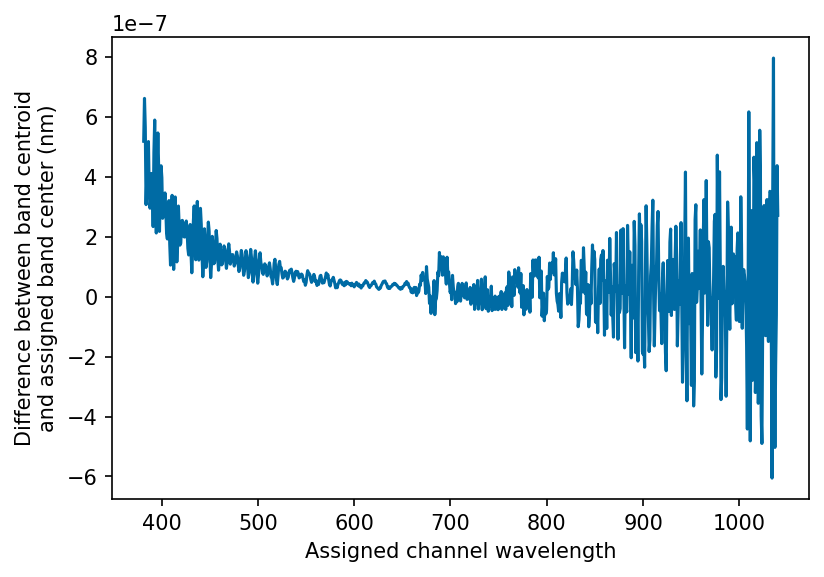

In [4]:
fig, ax = plt.subplots(1)
wl = ds_srfs.channel.values  # extract wavelengths for channels from netcdf file
band_centroids = (
    ds_srfs.masked_srf @ ds_srfs.wavelength
)  # take the dot product between the masked srfs and the dense wavelength grid
ax.plot(wl, band_centroids - wl)
ax.set_xlabel("Assigned channel wavelength")
ax.set_ylabel("Difference between band centroid\nand assigned band center (nm)")
fig.set_size_inches(6, 4)

Note that the negligible discrepancies at the sub-ppm level are due to interpolation routines used when converting the SRFs to the same grid used by TSIS HSRS and when converting the wavelengths from the internally-used "in-air" wavelengths to vacuum wavelengths. 

## Now compare wavelengths with air-LUSI spectrum files
This is to validate that the wavelength grids are the same in both files

In [5]:
ds = xr.load_dataset("../data/air_lusi_spectra.nc")

In [6]:
import sys

sys.path.append(r"../utils")
from air_vac_wavelength import air2vac, vac2air


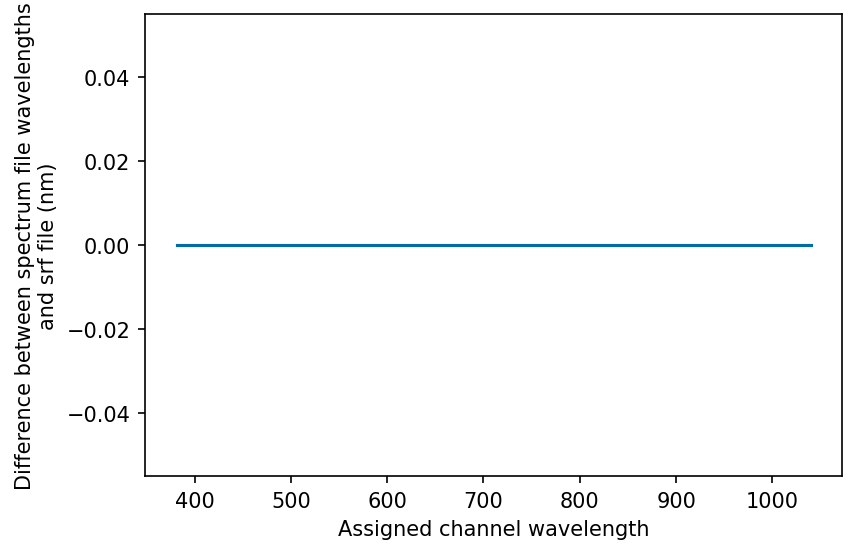

In [7]:
fig, ax = plt.subplots(1)
wl = ds_srfs.channel.values  # extract wavelengths from netcdf file
ax.plot(wl, ds.Wavelength.values - ds_srfs.channel.values)
ax.set_xlabel("Assigned channel wavelength")
ax.set_ylabel("Difference between spectrum file wavelengths\nand srf file (nm)")
fig.set_size_inches(6, 4)